## 1. Load all the libraries

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization
print("Loaded all libraries")

Loaded all libraries


In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


## 2. Data loading and exploration

In [3]:
fpath = '/content/drive/My Drive/test_set'
random_seed = 42

categories = os.listdir(fpath)
categories = categories[:20]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['1', '8', '2', '3', '10', '5', '4', '9', '6', '7', 'A', 'B'] 

No. of categories =  12


In [4]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  420 
No. of labels loaded =  420
<class 'list'> <class 'list'>


In [5]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (420, 227, 227, 3) 
Labels shape =  (420,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


- Check few random images and labels by displaying them in a graph

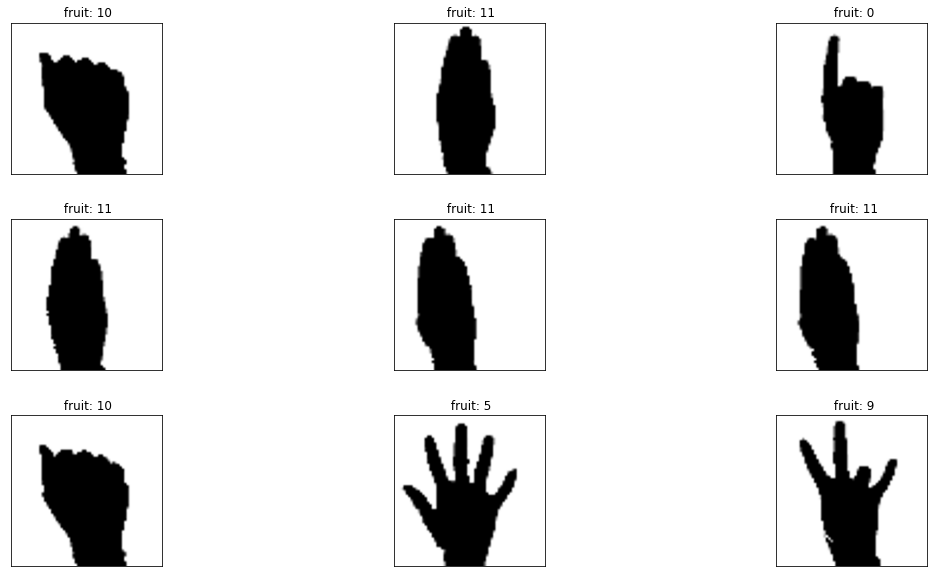

In [6]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title(' fruit: {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

## 3. Prepare data for training the CNN model

- For training the CNN model we have to shuffle all the data that is loaded in images, labels list.

In [7]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238

In [8]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (420, 227, 227, 3) 
Labels shape after shuffling =  (420,)


- Data normalization

In [9]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (420, 227, 227, 3)


- Display few random images after data normalization

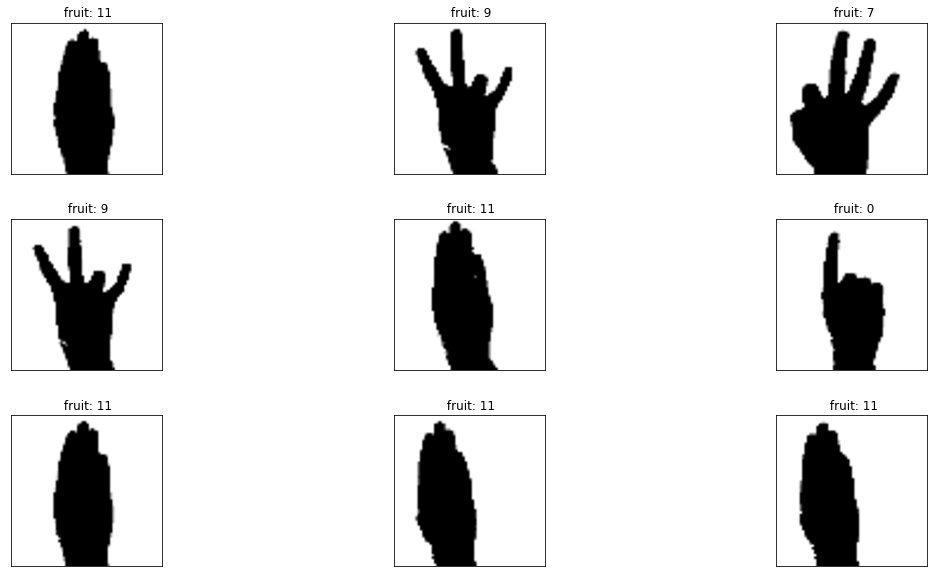

In [10]:
display_rand_images(images, labels)

- Split the loaded dataset into train, test sets

In [11]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (336, 227, 227, 3)
y_train shape =  (336,)

x_test shape =  (84, 227, 227, 3)
y_test shape =  (84,)


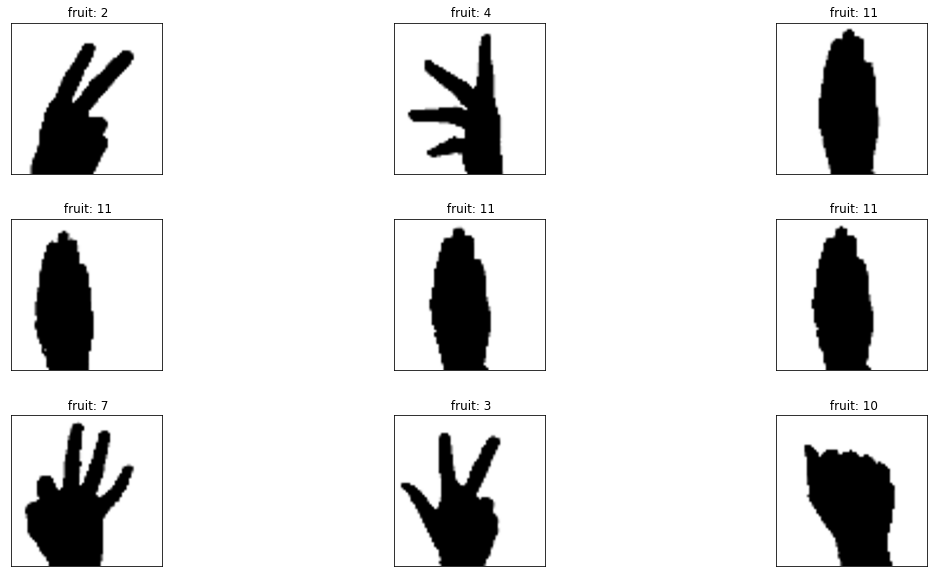

In [12]:
display_rand_images(x_train, y_train)

## 4. Define AlexNet CNN model

- Define all layers in the AlexNet CNN model

In [13]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                        

- Compile the CNN model

In [14]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## 5. Train the model

- Fit the model using training data

In [15]:

%%time
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
11/11 [==============================] - 33s 3s/step - loss: 1.4416 - accuracy: 0.6161
Epoch 2/15
11/11 [==============================] - 30s 3s/step - loss: 0.2925 - accuracy: 0.9137
Epoch 3/15
11/11 [==============================] - 33s 3s/step - loss: 0.0924 - accuracy: 0.9702
Epoch 4/15
11/11 [==============================] - 31s 3s/step - loss: 0.1999 - accuracy: 0.9345
Epoch 5/15
11/11 [==============================] - 29s 3s/step - loss: 0.0926 - accuracy: 0.9702
Epoch 6/15
11/11 [==============================] - 31s 3s/step - loss: 0.0221 - accuracy: 0.9970
Epoch 7/15
11/11 [==============================] - 31s 3s/step - loss: 0.0493 - accuracy: 0.9821
Epoch 8/15
11/11 [==============================] - 31s 3s/step - loss: 0.0539 - accuracy: 0.9792
Epoch 9/15
11/11 [==============================] - 31s 3s/step - loss: 0.0208 - accuracy: 0.9970
Epoch 10/15
11/11 [==============================] - 31s 3s/step - loss: 0.0101 - accuracy: 1.0000
Epoch 11/15
11/11 [

In [16]:
model_name = 'trained_model.h5'
model.save(model_name, save_format='h5')

- Metrics to evaluate accuracy and loss in test dataset

In [17]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

3/3 [==============================] - 2s 594ms/step - loss: 3.3700 - accuracy: 0.6190
3.3699986934661865 0.6190476417541504


## 6. Predict values using the trained model

In [18]:
pred = model.predict(x_test)

pred.shape

3/3 [==============================] - 2s 585ms/step


(84, 20)

- Display few random images with actual vs predicted values of labels

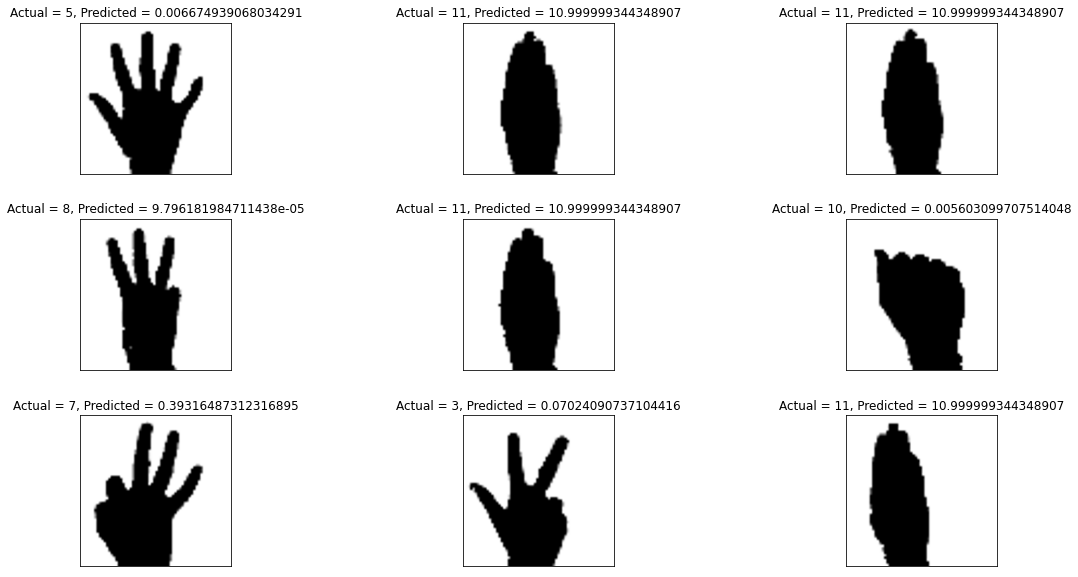

In [19]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

In [20]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image

## TO IGNORE WARNINGS
import warnings 
warnings.filterwarnings('ignore')

In [28]:
model.save('/content/drive/My Drive/webphising/trained_model.h5')

In [22]:
from keras.models import load_model

model =load_model('trained_model.h5')

In [23]:
classes = ['APPLES', 'BANANA',  'ORANGE','PINEAPPLE','WATERMELON']

In [24]:
from statistics import mode

In [25]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(227, 227))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    prediction = model.predict(img_processed)
    # print(prediction)
    index = np.argmax(prediction)
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)
    return str(classes[index]).title()

101_100.jpg
1/1 [==============================] - 0s 221ms/step
Watermelon
103_100.jpg
1/1 [==============================] - 0s 55ms/step
Watermelon
104_100.jpg
1/1 [==============================] - 0s 218ms/step
Watermelon
0_100.jpg
1/1 [==============================] - 0s 56ms/step
Watermelon
105_100.jpg
1/1 [==============================] - 0s 53ms/step
Watermelon
102_100.jpg
1/1 [==============================] - 0s 55ms/step
Watermelon
100_100.jpg
1/1 [==============================] - 0s 60ms/step
Watermelon
107_100.jpg
1/1 [==============================] - 0s 61ms/step
Watermelon
112_100.jpg
1/1 [==============================] - 0s 53ms/step
Watermelon
110_100.jpg
1/1 [==============================] - 0s 55ms/step
Watermelon
111_100.jpg
1/1 [==============================] - 0s 54ms/step
Watermelon
10_100.jpg
1/1 [==============================] - 0s 67ms/step
Watermelon
108_100.jpg
1/1 [==============================] - 0s 63ms/step
Watermelon
109_100.jpg
1/1 [=========

IndexError: ignored

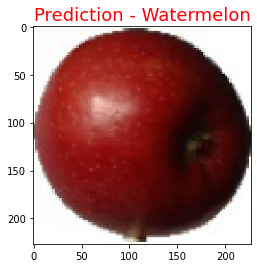

In [26]:
path = '/content/drive/My Drive/TRAIN_SET/APPLES/'
for i in os.listdir(path):
    print(i)
    result = predict_image(path+i, model)
    print(result)
    # if result == 'Malignant cases':
    #     print(i)
    # else:
    #     os.remove(path + i)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage, os
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border, mark_boundaries
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.misc
from glob import glob
from skimage.io import imread
import cv2

In [ ]:

import cv2
from matplotlib import pyplot as plt

#Import image
raw_im= cv2.imread("Malignant case.jpg")

#Show the image with matplotlib
plt.imshow(raw_im)
plt.show()


In [ ]:
imgray = cv2.cvtColor(raw_im, cv2.COLOR_BGR2GRAY)
ret, thr = cv2.threshold(imgray, 70, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)